In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/GSCred/cs-training.csv",index_col=0)#bueno
test=pd.read_csv('/content/drive/MyDrive/GSCred/cs-test.csv',index_col=0)

In [ ]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train.shape

(150000, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
train.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

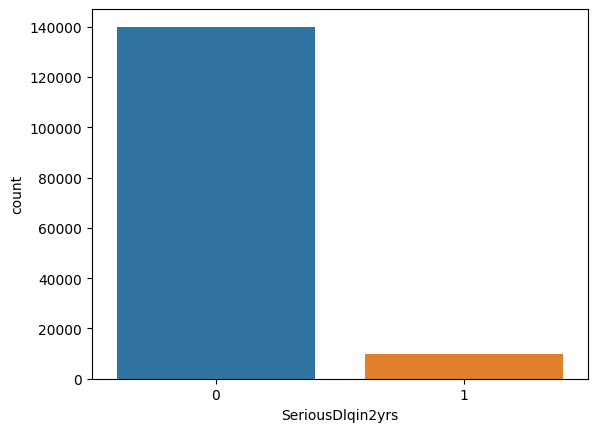

In [ ]:
import seaborn as sns

sns.countplot(data = train, x='SeriousDlqin2yrs')


**Null variables and missing values**


In [ ]:
data=data.dropna()

**Select output and input variables**

In [ ]:
x=train.drop('SeriousDlqin2yrs',axis=1)
y=train["SeriousDlqin2yrs"]

**Split train and test**

In [ ]:
x_train,x_test, y_train, y_test =train_test_split(x,y,random_state=1)

Nota:
Se divide en test y trainig para poder medir que tan bueno es el algoritmo y con x_train se entrena el algoritmo y con x_test vemos que tan bueno es. Si el resultado de la exactitud del entrenamiento es muy elevado comparado al testing sinifica que hay sobreajuste por lo que se debe modificar.
(si el entrenamiento es muy cercano a 1  y el testing es cercano a 0)

**Chossing Classifier**

In [ ]:
model = XGBClassifier()

Lo que va dentro de los parentesis del XGBClassifier() son los hiperparametros

**Fitting model**

In [ ]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

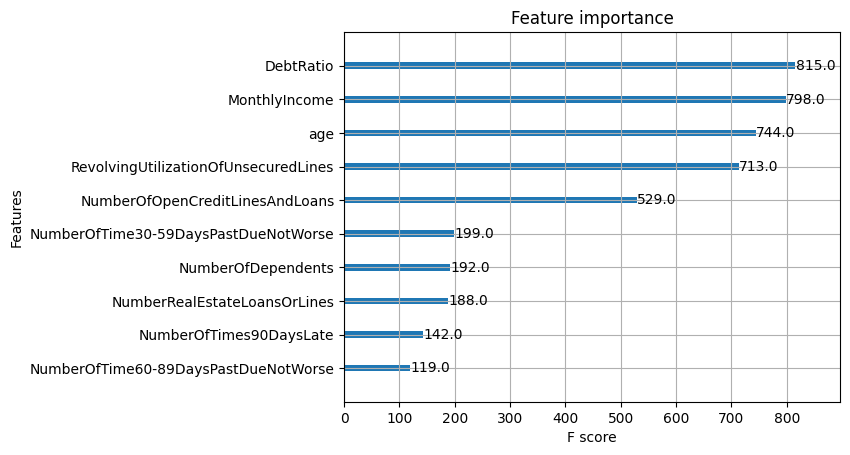

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, ax=plt.gca())

Lo anterior es para ver que variables toma mas en consideración el modelo

**Prediciting new values**

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions[1:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/GSCred/cs-test.csv', index_col=0)
p_test = test.drop(columns=['SeriousDlqin2yrs'])
pred = model.predict_proba(p_test)[:,1]
pred


array([0.03901678, 0.040048  , 0.01156645, ..., 0.0025841 , 0.1545113 ,
       0.03429062], dtype=float32)

In [ ]:
#output = pd.DataFrame({'Id': p_test.index,'Probability': pred})
#output.to_csv('submission.csv', index=False)

**Accuracy**

***Training accuracy***

In [ ]:
model.score(x_train, y_train)

0.9486369330716954

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train,pred_train)

array([[83550,   362],
       [ 4271,  2018]])

***Testing accuracy***

In [ ]:
model.score(x_test, y_test)

0.9324198483437541

In [ ]:
#confusion_matrix(y_test, predictions)

array([[27629,   371],
       [ 1661,   407]])